#### Machine Learning Data Peparation File

The idea is to have a three different classes for handling common Machine Learning related steps with regards to processing data. 
A major step of current Machine Learning models is to handle raw data, explore features, generate new features and pre-process them 
to feed them into a Machine Learning pipeline. Therefore, the three following classes defined and can be used for other Machine Learning projects.
Hint: these classes wrap up methods that already exists, (for instance, sklearn methods). Therefore, this module is considered to be rather 
an ease for Machine Learning project than implementing a completely new algorithm or whatsoever

   - **FeatureBuilder**: is a class used to generate features out of raw data. Its purpose is especially to handle special formats of data. At the current stage, it allows handling of the following two data source (others are to be added):
       - *Date and Time*: provdes methods for generating date and time related features
       - *GIS*: Geo Information System data. It is based on latitude and longitude columns and can create features out of them
   - **DataExplorer**: is used to generate quickly insights. It provides methods to handle different types of data, provides stats about columns and quickly generate plots to analyze relationsships
       - *Numerical*: provides methods to analyze numerical features (plots, density plots, correlations, etc.).
       - *Categorical*: provides methods to analyze categorical features (frequencies, plots, etc.)
       - *Mixed Type*: provides methods to analyze mixed types (basic stats, plots, etc.)
       - *Data by Time*: provides methods to analyze a feature by time, i.e. Time Series
       - *Geo Information*: provides methods for plotting and generating images with gis Data Information
   - **PreProcessor**: is a class that can be used to quickly generated data pre-processing pipelines. They provide methods for numerical and categorical features. They provide control for initializing Pre Processing classes. 
       - *Scaler*: includes Scaler from the scikit-learn to scale numerical data
       - *Imputer*: includes an Imputer for missing values from the scikit-learn to fill missing values
       - *Encoding*: incudes methods for encoding label data
       
In the following, some example use cases are shown for each of this classes. 
 

####  In a first step, all classes are imported

In [5]:
import sys
sys.path.append('..')
from src import DataExplorer, DataPreProcessor, FeatureBuilder

21:42:14,613 - file: gis  - func: <module> - line: 35 - WARNING - msg: HDBSCAN is not part of the scikit-learn package. To use it you need to install HDBSCAN via pip install HDBSCAN


### 1) Featurebuilder
The first use case is the feature builder. The data retrieves from it comes from the sunspot.csv file.
First, a Feature builder object created taking the timeseries as input. The mandatory ``ingest`` method is used to ingest the type of data

In [2]:
ts = "sunspots.csv"
builder = FeatureBuilder(ts)
builder.ingest()

13:05:47,192 - file: feature_builder  - func: __init__ - line: 316 - INFO - msg: The latitude and longitude columns are set to 'lat' and 'lon' upon object creation. You need to set them using ``set_lat`` and ``set_lon`` to ease execution 
13:05:47,193 - file: feature_builder  - func: __init__ - line: 509 - INFO - msg: Initialized a FeatureBuilder Object. The current feature family in the pipeline is set to time. Use ``set_current_pipeline_feature_family`` to reset it. Allowed arguments are ['time', 'gis'] 
13:05:47,194 - file: baseattrs  - func: ingest - line: 92 - INFO - msg: Data format was found in the ".csv" format. The respective reader function is pandas's "read_csv"
13:05:47,199 - file: baseattrs  - func: ingest - line: 97 - INFO - msg: The data was read successfully and can be accessed via the .input attribute.


#### This data contains time features in the columns month. Furthermore, a latitude and longitude column is created via random variables

In [3]:
import numpy as np

lat = np.random.normal(loc=51.5,scale=0.1, size=len(builder.input))
lon = np.random.normal(loc=-0.11, scale=0.1,size=len(builder.input))
builder.input['lat'] = lat
builder.input['lon'] = lon

In [4]:
# A simple look on the data yields the following
builder.input.head()

,Month,Sunspots,lat,lon
0,1749-01,58.0,51.420922,-0.057306
1,1749-02,62.6,51.591102,-0.118415
2,1749-03,70.0,51.616835,-0.167924
3,1749-04,55.7,51.526870,-0.051376
4,1749-05,85.0,51.313351,-0.003695


In [5]:
# And the data types
builder.feature_types

Month        object
Sunspots    float64
lat         float64
lon         float64
dtype: object

#### Gis features

  - GIS clustering features are generated using the feature builder

In [6]:
builder.GIS.add_clustering(kmeans=True,dbscan=True,birch=True,hdbscan=False,agglomerative=True)

13:05:47,254 - file: feature_builder  - func: add_clustering - line: 434 - INFO - msg: Adding a set of Geo cluster algorithm 


#### The feature builder wraps the gis pipeline by setting the current column family to gis and then runs the pipeline

In [7]:
builder.set_current_pipeline_feature_family('gis')
builder.wrap_and_run_current_pipeline()

13:05:47,263 - file: feature_builder  - func: set_current_pipeline_feature_family - line: 524 - INFO - msg: Setting current feature in_wrapped pipeline to "gis"
13:05:47,265 - file: feature_builder  - func: flush_pipeline - line: 68 - INFO - msg: Resetting the current pipeline with 1 steps
13:05:47,267 - file: feature_builder  - func: wrap_pip - line: 565 - INFO - msg: Wrapping all steps in the "gis" pipeline to a transformer list. The result is saved into the ``.wrapped_pipeline`` attribute
13:05:47,268 - file: feature_builder  - func: flush_pipeline - line: 68 - INFO - msg: Resetting the current pipeline with 1 steps
13:05:47,268 - file: feature_builder  - func: run_wrapped_pipeline - line: 607 - INFO - msg: Running a pipeline without saving temporary results. Applying the pipeline on the input data
13:05:47,269 - file: feature_builder  - func: run_wrapped_pipeline - line: 615 - INFO - msg: The data source for the transformation is in attribute "input"


C:\Users\DominikHeinz\Anaconda3\envs\rec\lib\site-packages\sklearn\cluster\_birch.py:635: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (3). Decrease the threshold.
  warnings.warn(


13:05:47,887 - file: feature_builder  - func: run_wrapped_pipeline - line: 620 - INFO - msg: The derives feature columns are: ['Month', 'Sunspots', 'lat', 'lon', 'clstr_kmeans', 'clstr_dbscan', 'clstr_birch', 'clstr_aggl']
13:05:47,888 - file: feature_builder  - func: run_wrapped_pipeline - line: 621 - INFO - msg: Transformed_Data shape is (2820, 8)
13:05:47,889 - file: feature_builder  - func: run_wrapped_pipeline - line: 622 - INFO - msg: Saving the transformed data into ``.transformed_input`` and the features into ``.transformed_features``


In [8]:
# The data is saved into the transformed_input attribute
builder.transformed_input.head()
# Different clusters have been derived depending on the clustering algorithm

,Month,Sunspots,lat,lon,clstr_kmeans,clstr_dbscan,clstr_birch,clstr_aggl
0,1749-01,58,51.4209,-0.0573061,6,0,0,0
1,1749-02,62.6,51.5911,-0.118415,4,0,0,1
2,1749-03,70,51.6168,-0.167924,4,0,0,1
3,1749-04,55.7,51.5269,-0.0513763,6,0,0,0
4,1749-05,85,51.3134,-0.00369462,2,0,0,0


#### Date and Time features

Furthermore, time and date features are generated using the feature builder
  - the first transformation is to convert a string column "Month" to a datetime
  - the second transformation is to retrieve basic features out of it
 

In [9]:
builder.Time.add_str_to_time('Month', "%Y-%m")
builder.Time.add_basic_features('Month', delete_original_column=False)


13:05:47,914 - file: feature_builder  - func: add_str_to_time - line: 287 - INFO - msg: Adding a string converter for feature(s) Month with format string '%Y-%m'
13:05:47,916 - file: feature_builder  - func: add_basic_features - line: 240 - INFO - msg: Adding basic time features for the following features: Month


In [10]:
# The pipeline wrapper is set to the "time" pipeline.
# wrapping the date pipeline yields new features
 
builder.set_current_pipeline_feature_family('time')
builder.wrap_and_run_current_pipeline()

13:05:47,927 - file: feature_builder  - func: set_current_pipeline_feature_family - line: 524 - INFO - msg: Setting current feature in_wrapped pipeline to "time"
13:05:47,929 - file: feature_builder  - func: flush_pipeline - line: 68 - INFO - msg: Resetting the current pipeline with 2 steps
13:05:47,930 - file: feature_builder  - func: wrap_pip - line: 565 - INFO - msg: Wrapping all steps in the "time" pipeline to a transformer list. The result is saved into the ``.wrapped_pipeline`` attribute
13:05:47,932 - file: feature_builder  - func: flush_pipeline - line: 68 - INFO - msg: Resetting the current pipeline with 1 steps
13:05:47,933 - file: feature_builder  - func: run_wrapped_pipeline - line: 607 - INFO - msg: Running a pipeline without saving temporary results. Applying the pipeline on the input data
13:05:47,934 - file: feature_builder  - func: run_wrapped_pipeline - line: 615 - INFO - msg: The data source for the transformation is in attribute "transformed_input"
13:05:47,979 - fi

C:\Users\DominikHeinz\Anaconda3\envs\rec\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


In [11]:
# The data is saved into the transformed_input attribute
builder.transformed_input.head()

,Month,Sunspots,lat,lon,Month_month,Month_year,Month_day,Month_dayofweek,Month_dayofyear,Month_week,...,Month_hours,Month_minute,Month_quarter,Month_is_leap_year,Month_is_is_month_end,Month_is_month_start,Month_is_quarter_start,Month_is_quarter_end,Month_is_year_start,Month_is_year_end
0,1749-01-01,58,51.4209,-0.0573061,1,1749,1,2,1,1,...,0,0,1,False,False,True,True,False,True,False
1,1749-02-01,62.6,51.5911,-0.118415,2,1749,1,5,32,5,...,0,0,1,False,False,True,False,False,False,False
2,1749-03-01,70,51.6168,-0.167924,3,1749,1,5,60,9,...,0,0,1,False,False,True,False,False,False,False
3,1749-04-01,55.7,51.5269,-0.0513763,4,1749,1,1,91,14,...,0,0,2,False,False,True,True,False,False,False
4,1749-05-01,85,51.3134,-0.00369462,5,1749,1,3,121,18,...,0,0,2,False,False,True,False,False,False,False


### 2) DataExplorer
The second use case is the data explorer. we are using the transformed file as input
Once more, the mandatory ``ingest`` method is used to ingest the type of data

In [12]:
explorer = DataExplorer(builder.transformed_input)
explorer.ingest()

13:05:48,59 - file: baseattrs  - func: ingest - line: 102 - INFO - msg: Data format is already a pandas DataFrame. It is written into the .input attribute."


In [13]:
# Using this file, gis data can be visualized 
# First, the GIS features are set
explorer.GIS_features = ['lat','lon']

after setting the gis to the features "lat" and "lon", the data is vizualized on a simple plot

13:05:48,76 - file: explorer  - func: GIS_Data - line: 361 - INFO - msg: Setting the GIS DataFrame of size 2820 with lat as the latitude column and lon as the longitude column.Note that you can reset them if necessary


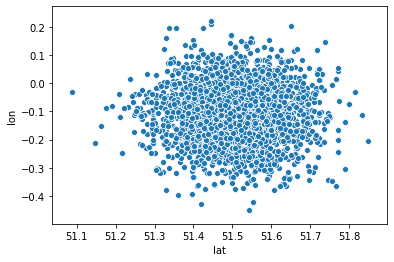

In [14]:
explorer.GIS_Data.simple_plot()

In [15]:
# If the folium package is installed, we can also check where this data is found on a real map
explorer.GIS_Data.generate_heat_map()

13:05:48,246 - file: explorer  - func: GIS_Data - line: 361 - INFO - msg: Setting the GIS DataFrame of size 2820 with lat as the latitude column and lon as the longitude column.Note that you can reset them if necessary
13:05:48,255 - file: gis  - func: generate_heat_map - line: 179 - INFO - msg: Creating a HeatMap and saving it in the .map attribute.


In [16]:
# Examining if there are Date columns via the ``date_features`` property yields
explorer.date_features

['Month']

In [17]:
# We can now examine some data by time. THe intial values for the sunsport is therefore set to be analyzed with time
explorer.Date_By_Data = 'Sunspots'

13:05:49,271 - file: explorer  - func: Date_By_Data - line: 345 - INFO - msg: Created Date DataFrame of size 1 with the following columns: ['Month']


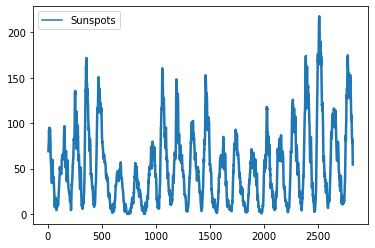

In [18]:
# Plotting the data for the month time stamps yields
explorer.Date_By_Data.rolling_mean_plot()

In [19]:
# Having a look on the property of all features colums
print(explorer.all_feature_columns)
# and the respective types
print(explorer.feature_types)
# we see that most features are now string features. 

['Month', 'Sunspots', 'lat', 'lon', 'Month_month', 'Month_year', 'Month_day', 'Month_dayofweek', 'Month_dayofyear', 'Month_week', 'Month_weekofyear', 'Month_hours', 'Month_minute', 'Month_quarter', 'Month_is_leap_year', 'Month_is_is_month_end', 'Month_is_month_start', 'Month_is_quarter_start', 'Month_is_quarter_end', 'Month_is_year_start', 'Month_is_year_end']
Month                     datetime64[ns]
Sunspots                          object
lat                               object
lon                               object
Month_month                       object
Month_year                        object
Month_day                         object
Month_dayofweek                   object
Month_dayofyear                   object
Month_week                        object
Month_weekofyear                  object
Month_hours                       object
Month_minute                      object
Month_quarter                     object
Month_is_leap_year                object
Month_is_is_month_end 

In [20]:
# Several of the feature are reset to a numeric data type
numerical_features = explorer.all_feature_columns[1:14]
for num_ftr in numerical_features:
    explorer.reset_feature_type(num_ftr, explorer.dtype_num)
# this yields
print(explorer.feature_types)

Month                     datetime64[ns]
Sunspots                         float64
lat                              float64
lon                              float64
Month_month                      float64
Month_year                       float64
Month_day                        float64
Month_dayofweek                  float64
Month_dayofyear                  float64
Month_week                       float64
Month_weekofyear                 float64
Month_hours                      float64
Month_minute                     float64
Month_quarter                    float64
Month_is_leap_year                object
Month_is_is_month_end             object
Month_is_month_start              object
Month_is_quarter_start            object
Month_is_quarter_end              object
Month_is_year_start               object
Month_is_year_end                 object
dtype: object


13:05:50,706 - file: explorer  - func: Numerical_Data - line: 155 - INFO - msg: Setting numerical DataFrame of size 13 with the following columns: ['Sunspots', 'lat', 'lon', 'Month_month', 'Month_year', 'Month_day', 'Month_dayofweek', 'Month_dayofyear', 'Month_week', 'Month_weekofyear', 'Month_hours', 'Month_minute', 'Month_quarter']


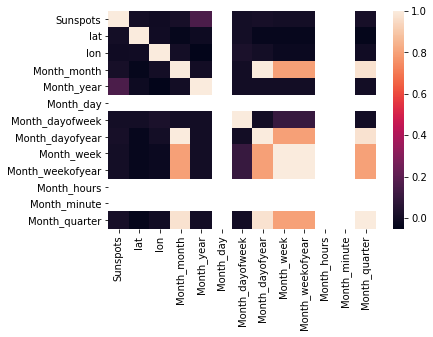

In [21]:
# Now, we can generate insights for the numerical feature types as correlation
explorer.Numerical_Data.corr()

13:05:51,560 - file: explorer  - func: Numerical_Data - line: 155 - INFO - msg: Setting numerical DataFrame of size 13 with the following columns: ['Sunspots', 'lat', 'lon', 'Month_month', 'Month_year', 'Month_day', 'Month_dayofweek', 'Month_dayofyear', 'Month_week', 'Month_weekofyear', 'Month_hours', 'Month_minute', 'Month_quarter']


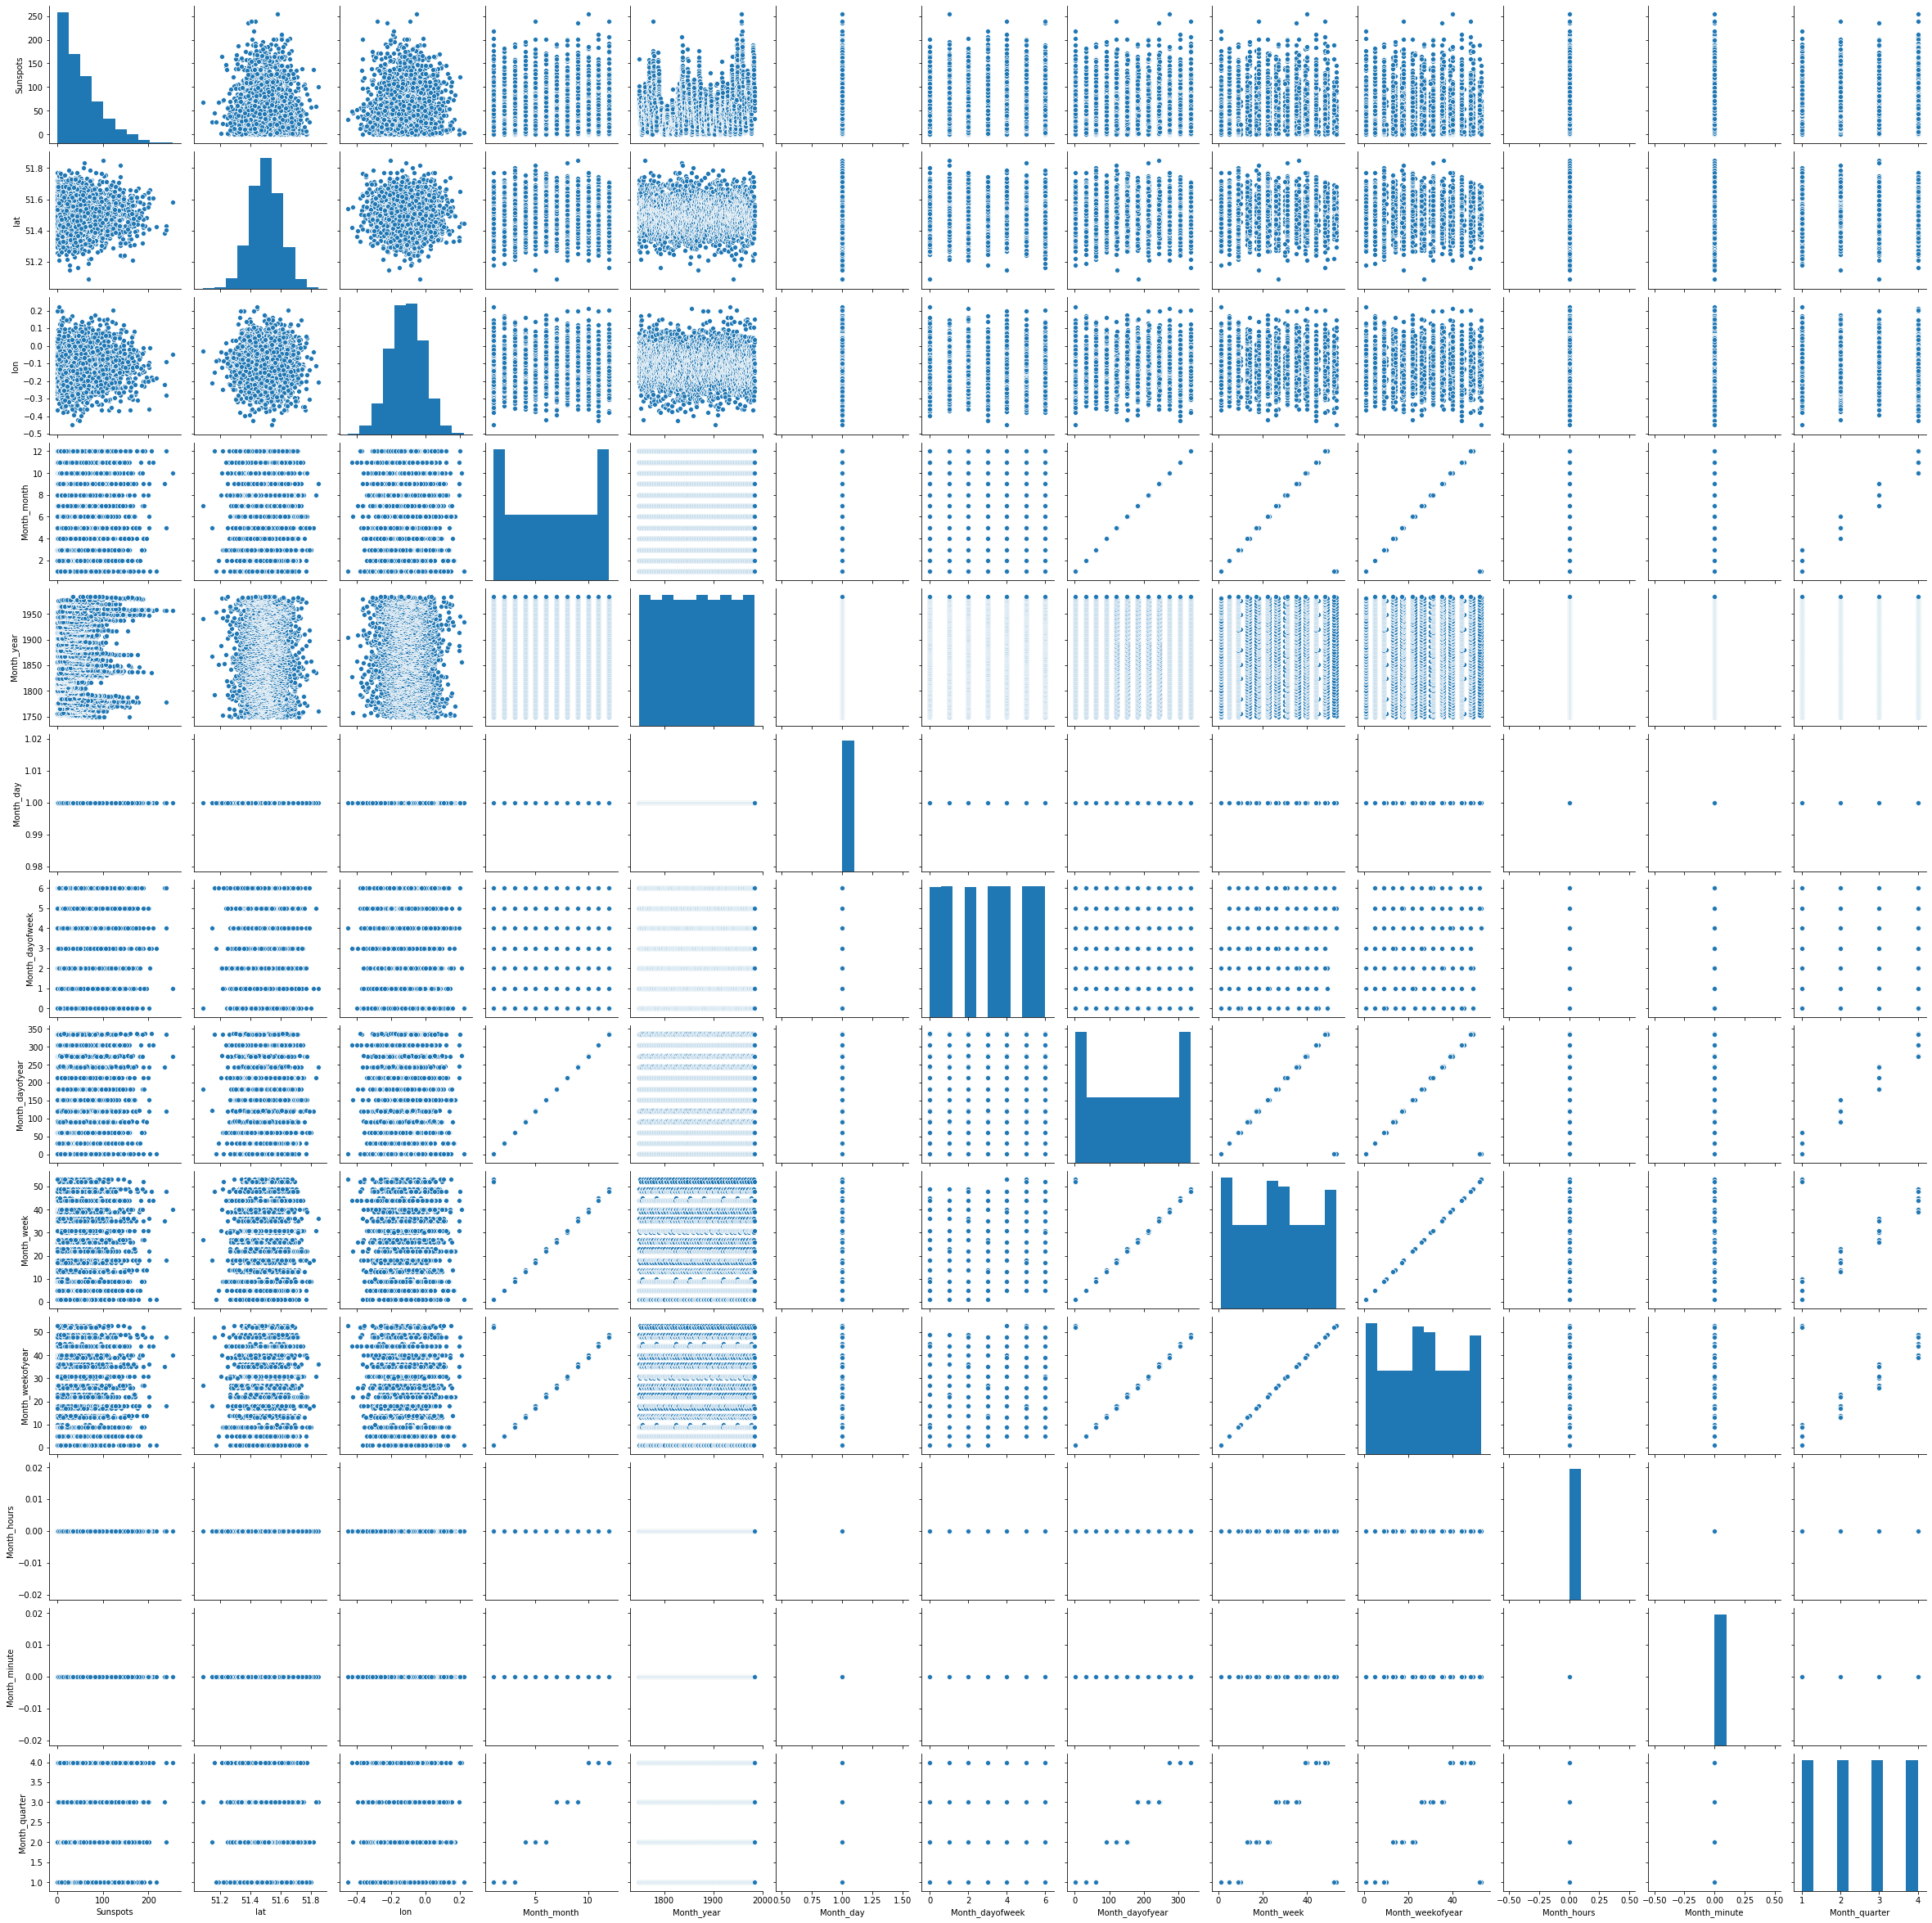

In [22]:
# or pairplots
explorer.Numerical_Data.pair_plot()

### 3) DataPreProcessor
The third use case is the data preprocessor. if we want to apply a Machine Learning algorithm on a target column, there are steps to apply prior to run the algorithm. Assume we wanted to predict the sunspots column using the features we created so far (the model will probably have a poor predictive power as it is a time series analyzes and we take the obervation as they are and added white noise). We could do so by setting the "sunspot" target to the target columns and the other as features.
For this module to run corretly, we first have to import the config file containing the mappings for the DataPreProcessor

In [23]:
from src import YamlParser
config = YamlParser('config.yaml').read().get_file()

In [24]:
# afterwards, a DataPreProcessor can be initialized using
preprocessor = DataPreProcessor(explorer.input, target_name="Sunspots", config=config)
preprocessor.ingest()

13:06:24,692 - file: baseattrs  - func: ingest - line: 102 - INFO - msg: Data format is already a pandas DataFrame. It is written into the .input attribute."


In [26]:
# using the standard pipeline builder, we can go straigthforward and construct a pipeline
# The pipeline checks the different types and adds pipeline steps correspondingly
preprocessor.create_pipeline()

13:06:36,885 - file: preprocess  - func: create_pipeline - line: 377 - INFO - msg: Generating a data processing pipeline


Pipeline(memory=None,
         steps=[('feature_transformation',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('Numerical',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  TypeSelector(dtype=<class 'numpy.number'>)),
                                                                 ('imputer',
                                                                  SimpleImputer(add_indicator=False,
                                                                                copy=True,
                                                                                fill_value=None,
                                                                                missing_values=nan,
                                                                                strategy='mean',
         

In [27]:
# for more control, steps can be adjusted using
preprocessor.Scaler = 'standard'
preprocessor.Encoder = 'binarize'

13:06:37,746 - file: preprocess  - func: Scaler - line: 179 - INFO - msg: Setting Scaler to standard with standard arguments
13:06:37,748 - file: preprocess  - func: Encoder - line: 288 - INFO - msg: Setting String Encoder to binarize with standard arguments


In [28]:
# creating a new pipeline yields 
pipe = preprocessor.create_pipeline()

13:06:38,798 - file: preprocess  - func: create_pipeline - line: 377 - INFO - msg: Generating a data processing pipeline


In [29]:
# This pipeline can the be used to fit_transform input data.
pipe

Pipeline(memory=None,
         steps=[('feature_transformation',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('Numerical',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  TypeSelector(dtype=<class 'numpy.number'>)),
                                                                 ('imputer',
                                                                  SimpleImputer(add_indicator=False,
                                                                                copy=True,
                                                                                fill_value=None,
                                                                                missing_values=nan,
                                                                                strategy='mean',
         

In [30]:
# Alternatively, running the "get_train_test_data" creates a pipeline and applies the transformation diretly to get the train and test data
data = preprocessor.get_train_test_data()

13:06:42,127 - file: preprocess  - func: create_pipeline - line: 377 - INFO - msg: Generating a data processing pipeline
13:06:42,142 - file: preprocess  - func: get_train_test_data - line: 452 - INFO - msg: Transforming initial input data
13:06:45,722 - file: preprocess  - func: get_train_test_data - line: 454 - INFO - msg: Splitting to train and test data


In [31]:
# The train and test data can now be accessed in the ``data`` object

In [32]:
data.train.shape, data.test.shape

((2256, 20), (564, 20))